In [1]:
# Import the relevant modules
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
data = load_breast_cancer()

In [3]:
# Check data properties
print("Type:", type(data))

Type: <class 'sklearn.utils.Bunch'>


In [4]:
print("Keys:", data.keys()) # Shows the keys of the data
print("Shape:", data.data.shape) # Check the shape of X
print("Targets:", data.target.shape) # Check the shape of Y
print("Feature Names:", data.feature_names) # Print the input feature names
print("Targets Names:", data.target_names)

Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape: (569, 30)
Targets: (569,)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets Names: ['malignant' 'benign']


In [5]:
# We split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [6]:
# We scale the data
# StandardScaler is used for normalizing the data
# This is to prevent inputs from having very different ranges

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
# We build the model
# Sigmoid to make sure the output is 0/1 

model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [9]:
# Loss and optimizer

criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters())

In [10]:
# We convert the data into Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

# Targets are reshaped to be 2D arrays of shape Nx1
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [11]:
# Train the model
number_epochs = 2000
train_losses = np.zeros(number_epochs)
test_losses = np.zeros(number_epochs)

for iteration in range(number_epochs):

    # We train the model
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # We are also interested in the test/validation loss, to make sure we are not overtiffing
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # We save the losses
    train_losses[iteration] = loss.item()
    test_losses[iteration] = loss_test.item()

    if (iteration+1) % 50 == 0:
        print("Epoch: {}/{}, Train Loss: {:.5f}, Test Loss: {:5f}".format(iteration+1, number_epochs, loss.item(), loss_test.item()))

Epoch: 50/2000, Train Loss: 0.44031, Test Loss: 0.422903
Epoch: 100/2000, Train Loss: 0.32819, Test Loss: 0.320691
Epoch: 150/2000, Train Loss: 0.26488, Test Loss: 0.261279
Epoch: 200/2000, Train Loss: 0.22472, Test Loss: 0.223027
Epoch: 250/2000, Train Loss: 0.19709, Test Loss: 0.196630
Epoch: 300/2000, Train Loss: 0.17697, Test Loss: 0.177405
Epoch: 350/2000, Train Loss: 0.16166, Test Loss: 0.162792
Epoch: 400/2000, Train Loss: 0.14961, Test Loss: 0.151301
Epoch: 450/2000, Train Loss: 0.13985, Test Loss: 0.142019
Epoch: 500/2000, Train Loss: 0.13176, Test Loss: 0.134358
Epoch: 550/2000, Train Loss: 0.12493, Test Loss: 0.127922
Epoch: 600/2000, Train Loss: 0.11906, Test Loss: 0.122436
Epoch: 650/2000, Train Loss: 0.11395, Test Loss: 0.117703
Epoch: 700/2000, Train Loss: 0.10945, Test Loss: 0.113580
Epoch: 750/2000, Train Loss: 0.10545, Test Loss: 0.109959
Epoch: 800/2000, Train Loss: 0.10186, Test Loss: 0.106757
Epoch: 850/2000, Train Loss: 0.09861, Test Loss: 0.103909
Epoch: 900/2000

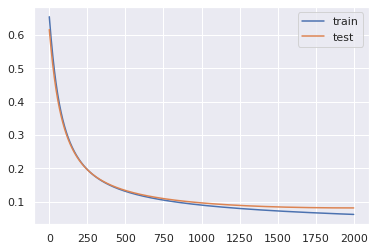

In [12]:
# Plot the train and test losses
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

In [13]:
# Get the accuracy
with torch.no_grad():
    p_train = model(X_train) # Calculate the prediction
    p_train = np.round(p_train.numpy()) # convert tensors to np, and round them
    train_accuracy = np.mean(y_train.numpy() == p_train) # point-wise comparison and take the mean

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_accuracy = np.mean(y_test.numpy() == p_test)

print('Train Accuracy: {}, Test Accuracy: {}'.format(train_accuracy, test_accuracy))

Train Accuracy: 0.9868766404199475, Test Accuracy: 0.9840425531914894


In [14]:
# Look at the state dict
# This is an ordered dictionary containing the parameters of the model

model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3629, -0.6469, -0.6450, -0.4166, -0.1445, -0.2198, -0.7215, -0.4966,
                       -0.1642,  0.7043, -0.5615,  0.3237, -0.5195, -0.5029, -0.1920,  0.8890,
                        0.0109, -0.4300,  0.3924,  0.4940, -0.5816, -0.7538, -0.4077, -0.6343,
                       -0.5048, -0.1590, -0.5495, -0.4894, -0.5290, -0.5491]])),
             ('0.bias', tensor([0.6421]))])

In [15]:
# Save the model
torch.save(model.state_dict(), 'LinearClassification.pt')

In [16]:
# Load the model
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('LinearClassification.pt'))

<All keys matched successfully>

In [17]:
# Evaluate the model
with torch.no_grad():
    p_train = model2(X_train) # Calculate the prediction
    p_train = np.round(p_train.numpy()) # convert tensors to np, and round them
    train_accuracy = np.mean(y_train.numpy() == p_train) # point-wise comparison and take the mean

    p_test = model2(X_test)
    p_test = np.round(p_test.numpy())
    test_accuracy = np.mean(y_test.numpy() == p_test)

print('Train Accuracy: {}, Test Accuracy: {}'.format(train_accuracy, test_accuracy))

Train Accuracy: 0.9868766404199475, Test Accuracy: 0.9840425531914894
